### 1. 문제 정의

- BX : 사원들의 올바른 식단 관리를 통해 업무의 효율성을 증대 및 복지를 통한 회사 만족감을 향상, 사내 식당의 재고를 효율적으로 관리하여 손실을 최소화화고 운영 효율성 제고
- CX : 적정한 식수 예측 -> 식사시간대에 음식이 부족하거나 남지 않도록 하여 고객의 불만을 줄이고 만족도 향상, 영양사의 식단 구성 도움.
- DX : 식수 예측과 관련된 정보를 지속적으로 파악하고 개선하여 영양소를 고려한 적절한 식단 프로그램 개발 (휴가일정, 출장일정, 약은이 잦은 일수 등을 고려하여 식수 계산)
-----------------------------------------------------------------------------------------------------------------------------------------------------------
- Trigger : 최근 사내 식당의 음식 재고관리 문제로 인한 손실 발생 증가, 사내 식당 이용하는 사원들의 불만족 수치 증가
- Accelerator : 메뉴 정보, 근무자의 정보, 석식식수 데이터 등 파악
- Traker : 식수 예측 정확도와 재고 손실 변화 추이를 확인, 직원들의 사내 식당 만족도 및 이용률 변화 추이 확인


In [171]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고창 제거
import warnings
warnings.filterwarnings('ignore')

### 2. 데이터 수집

In [172]:
df = pd.read_csv('data/Cafeteria.csv', encoding = 'cp949')
df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


- 데이터 정보
| 컬럼명                    | 설명                                     |
|--------------------------|----------------------------------------|
| 일자                     | 데이터가 수집된 날짜                    |
| 요일                     | 해당 날짜의 요일                        |
| 본사정원수               | 본사에 근무하는 전체 직원 수             |
| 본사휴가자수             | 본사에 휴가 중인 직원 수                |
| 본사출장자수             | 본사에 출장 중인 직원 수                |
| 본사시간외근무명령서승인건수 | 본사에서 승인된 시간 외 근무 명령서 건수  |
| 현본사소속재택근무자수   | 본사 소속 중 재택 근무 중인 직원 수     |
| 조식메뉴                 | 해당 날짜의 조식 메뉴                   |
| 중식메뉴                 | 해당 날짜의 중식 메뉴                   |
| 석식메뉴                 | 해당 날짜의 석식 메뉴                   |
| 중식계                   | 해당 날짜에 중식을 이용한 직원 수       |
| 석식계                   | 해당 날짜에 석식을 이용한 직원 수       |

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


### 3. 전처리

In [174]:
df.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [175]:
# 일자 -> 문자열 형태이나 "시간"의 정보를 가짐 -> datetime 시가능로 변경
import datetime
df['일자'] = pd.to_datetime(df['일자'])

In [176]:
df['일자']
# 일자별로 계산 및 비교가 가능해짐!!

0      2016-02-01
1      2016-02-02
2      2016-02-03
3      2016-02-04
4      2016-02-05
          ...    
1200   2021-01-20
1201   2021-01-21
1202   2021-01-22
1203   2021-01-25
1204   2021-01-26
Name: 일자, Length: 1205, dtype: datetime64[ns]

In [177]:
# 데이터가 수집된 기간 확인
df['일자'].min(), df['일자'].max()

(Timestamp('2016-02-01 00:00:00'), Timestamp('2021-01-26 00:00:00'))

### 4. 탐색적 데이터 분석

In [178]:
# 요일별 식수 확인 (중식계, 석식계)
day_mean = df.groupby('요일')[['중식계', '석식계']].mean()
day_mean

,중식계,석식계
요일,,
금,653.609959,404.979253
목,823.991803,480.401639
수,905.213389,363.615063
월,1144.331950,538.933610
화,925.620833,520.129167


In [179]:
# 인덱스 순서 변경하기 (월화수목금)
day_mean = pd.DataFrame(day_mean, index = ['월', '화', '수', '목', '금'])
day_mean

,중식계,석식계
월,1144.331950,538.933610
화,925.620833,520.129167
수,905.213389,363.615063
목,823.991803,480.401639
금,653.609959,404.979253


(600.0, 1201.5485477178424)

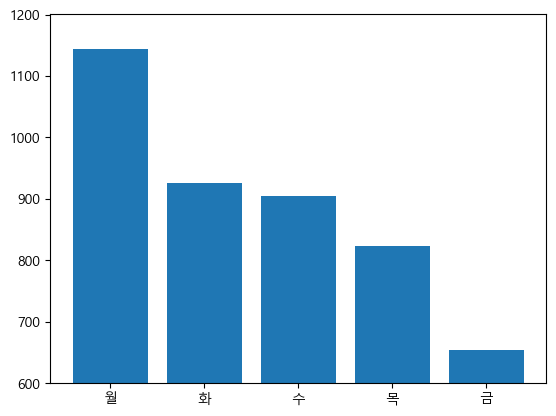

In [180]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.bar(day_mean.index, day_mean['중식계'])
plt.ylim(600) # 제한해서 y 값 자세히 보기
# 결과 : 월요일에 중식계에 대한 식수가 갖아 많음
# 주 후반으로 갈수록 식수는 감소한다
# 금요일이 가장 낮은 중시계를 보임

<BarContainer object of 5 artists>

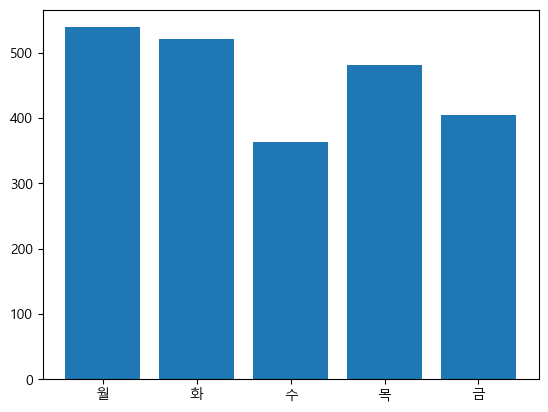

In [181]:
plt.bar(day_mean.index, day_mean['석식계'])

In [182]:
# 월별 식수 확인
df['month'] = df['일자'].dt.month
df['month']

0       2
1       2
2       2
3       2
4       2
       ..
1200    1
1201    1
1202    1
1203    1
1204    1
Name: month, Length: 1205, dtype: int32

(800.0, 1039.1048387096773)

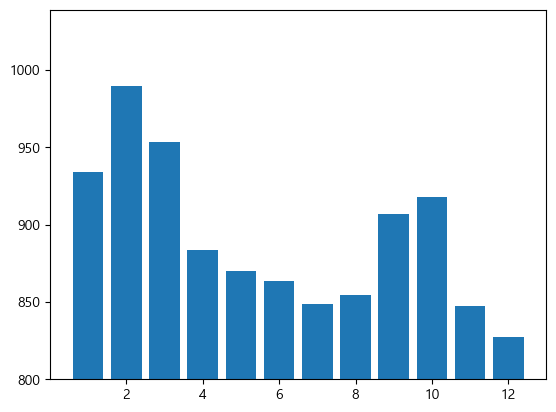

In [183]:
# 월별 중식계 평균 식수 확인 -> 그래프화
month_mean = df.groupby('month')[['중식계', '석식계']].mean()
plt.bar(month_mean.index, month_mean['중식계'])
plt.ylim(800)


In [184]:
# 조식, 중식, 석식 메뉴에 대한 분석
df['조식메뉴'][0]

'모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐어채무침  포기김치 (배추,고추가루:국내산) '

In [185]:
# 메뉴 데이터가 공백 (' ')으로 분리되어 있음을 확인
# 메뉴 데이터의 공백 확인
df['조식메뉴'][0].replace(' ', '*')

'모닝롤/찐빵**우유/두유/주스*계란후라이**호두죽/쌀밥*(쌀:국내산)*된장찌개**쥐어채무침**포기김치*(배추,고추가루:국내산)*'

In [186]:
# 공백의 개수가 불규칙하네 -> 맞춰주자
# 메뉴를 분리하기 전 명확한 기준을 지정하기 위해서 공백 2개 -> 공백 1개로 변경 (모두 공백1개로 통일)
df['조식메뉴'] = df['조식메뉴'].str.replace('  ',' ')
df['중식메뉴'] = df['중식메뉴'].str.replace('  ',' ')
df['석식메뉴'] = df['석식메뉴'].str.replace('  ',' ')

In [187]:
# 공백을 기준으로 메뉴 분리하기
df['조식메뉴'] = df['조식메뉴'].str.split(' ') # split의 결과 : 문자열이 list 형태로 담기게 됨
df['중식메뉴'] = df['중식메뉴'].str.split(' ')
df['석식메뉴'] = df['석식메뉴'].str.split(' ')

In [188]:
df['중식메뉴'][0]

['쌀밥/잡곡밥',
 '(쌀,현미흑미:국내산)',
 '오징어찌개',
 '쇠불고기',
 '(쇠고기:호주산)',
 '계란찜',
 '청포묵무침',
 '요구르트',
 '포기김치',
 '(배추,고추가루:국내산)',
 '']

- 공백을 기준으로 나눈 메뉴들을 분석
  - TF-IDF (Term Frequency - Inverse Document Frequency)를 활용하여 빈도수가 높은 메뉴를 확인
  - 추가로 메인 메뉴를 선정하기 위해 불필요한 정보인 원산지 정보를 제거 필요

In [189]:
# 정규표현식 : 문자열 검색 및 패턴 매칭에 사용
# '소괄호 안에 들어있는 내용 다 지워주세요' 라는 패턴 매칭 진행
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [190]:
# 원산지 정보 제거하는 함수 정의
# re.sub(패턴, 바꾸고자 하는 값, 바꾸려고하는 텍스트) : 정규 표현식을 사용하여 문자열의 부분을 치환해주는 함수    
def remove(text) :
    return re.sub(r'\([^)]*\)', '', text) 
# [^)] : 닫는 괄호가 나타나기 전까지 모든 문자를 찾아주세요
# * : 모든 문자를 해결해주세요(지워주세요) - 반복을 의미

In [191]:
# lambda 함수 : 간단한 함수가 필요한 경우에 사용
(lambda x, y : x + y)(10, 20)

# def sum_num (x, y) :
#     return x + y
# sum_num(10, 20)

30

In [192]:
# 리스트 데이터를 문자열로 변환하여 저장 (tf-idf 적용을 위해)
df['조식메뉴'] = df['조식메뉴'].apply(lambda x: ' '.join(x)) # ' '공백 하나씩을 넣어서 연결해줘
df['중식메뉴'] = df['중식메뉴'].apply(lambda x: ' '.join(x))
df['석식메뉴'] = df['석식메뉴'].apply(lambda x: ' '.join(x))

In [193]:
# 원산지 정보 제거
df['조식메뉴_정제'] = df['조식메뉴'].apply(remove)
df['중식메뉴_정제'] = df['중식메뉴'].apply(remove)
df['석식메뉴_정제'] = df['석식메뉴'].apply(remove)

In [194]:
df['석식메뉴_정제']

0                쌀밥/잡곡밥  육개장 자반고등어구이 두부조림 건파래무침 포기김치  
1                 콩나물밥*양념장  어묵국 유산슬  아삭고추무침 바나나 포기김치  
2            쌀밥/잡곡밥  청국장찌개 황태양념구이  고기전  새송이버섯볶음 포기김치  
3                  미니김밥*겨자장  우동 멕시칸샐러드 군고구마 무피클 포기김치  
4            쌀밥/잡곡밥  차돌박이찌개  닭갈비  감자소세지볶음 콩나물무침 포기김치  
                             ...                      
1200    김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치 
1201           흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치 
1202       흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치 
1203           흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치 
1204             할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기 
Name: 석식메뉴_정제, Length: 1205, dtype: object

- 중식 메뉴만 가져와서 벡터화

In [195]:
tfidf_vector = TfidfVectorizer()
X = tfidf_vector.fit_transform(df['중식메뉴_정제'])

In [196]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [197]:
# TF-IDF 점수를 DF로 변환해서 확인 (메뉴이름과 매칭하여 확인)
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_vector.get_feature_names_out())
tfidf_df.head()

,d오리엔탈d,la갈비구이,가래떡구이,가래떡돼지갈비찜,가래떡츄러스,가자미무조림,가자미양념찜,가자미엿장구이,가자미엿장조림,가자미유린기,...,훈제오리구이,훈제오리냉채,훈제오리단호박볶음,훈제오리마늘볶음,훈제오리볶음,흑미밥,흑임자d,흑임자드레싱,흑임자연근샐러드,히레카츠
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
pd.set_option('display.max_rows', None)
tfidf_df.iloc[0]

d오리엔탈d           0.000000
la갈비구이           0.000000
가래떡구이            0.000000
가래떡돼지갈비찜         0.000000
가래떡츄러스           0.000000
가자미무조림           0.000000
가자미양념찜           0.000000
가자미엿장구이          0.000000
가자미엿장조림          0.000000
가자미유린기           0.000000
가자미카레튀김          0.000000
가자미튀김            0.000000
가지고추장무침          0.000000
가지구이             0.000000
가지나물             0.000000
가지나물무침           0.000000
가지무침             0.000000
가지볶음             0.000000
가지완자튀김           0.000000
가지찜              0.000000
가쯔오국             0.000000
가쯔오장국            0.000000
간장               0.000000
간장깻잎지            0.000000
간장돼지갈비찜          0.000000
간장두부조림           0.000000
간장마늘치킨           0.000000
간장양념             0.000000
간장찜닭             0.000000
간장치킨             0.000000
간장파닭             0.000000
갈릭돈가스            0.000000
갈릭돈까스            0.000000
갈릭버섯탕수           0.000000
갈릭순살치킨           0.000000
갈비만두             0.000000
갈비탕              0.000000
갈비통통만두           0.000000
갈치감자조림      

In [199]:
# 각 메뉴별로 TF-IDF 점수가 가장 높은 1개의 음색 인덱스 확인
tfidf_df.iloc[0].argmax()

1150

In [200]:
# 1150번이 가지는 음식 이름 확인
top_idx = tfidf_df.iloc[0].argmax()

In [201]:
# 해당 인덱스로 메뉴를 인덱싱
tfidf_df.columns[top_idx]

'오징어찌개'

In [202]:
# 위에서 벡터화한 코드부터 점수가 가장 높은 메뉴를 뽑아오는 코드까지 함수화하여 모든 메뉴에 적용해보기
def extract_main_dishes(menu_series) :
    tfidf_vector = TfidfVectorizer()
    # 조식, 중식, 석식 메뉴별로 점수 변환
    X = tfidf_vector.fit_transform(menu_series)

    # DataFrame으로 변환
    tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_vector.get_feature_names_out())

    # 각 메뉴별로 TF-IDF 점수가 높은 단어를 추출하는 과정 -> 함수화하기
    def top_tfidf_word (row) :
        top_idx = row.argmax()
        return tfidf_df.columns[top_idx]

    # tfidf_df에 적용하는 코드
    main_dishes = tfidf_df.apply(lambda row : top_tfidf_word(row), axis = 1)
    return main_dishes

In [203]:
# 함수 적용하기
df['조식메뉴_메인'] = extract_main_dishes(df['조식메뉴_정제'])
df['중식메뉴_메인'] = extract_main_dishes(df['중식메뉴_정제'])
df['석식메뉴_메인'] = extract_main_dishes(df['석식메뉴_정제'])

In [206]:
# 메인메뉴 확인
df[['조식메뉴_메인', '중식메뉴_메인', '석식메뉴_메인']] # 날짜 기준으로 정렬된 

,조식메뉴_메인,중식메뉴_메인,석식메뉴_메인
0,쥐어채무침,오징어찌개,건파래무침
1,단호박샌드,김치찌개,콩나물밥
2,느타리호박볶음,견과류조림,새송이버섯볶음
3,근대국,부추전,미니김밥
4,방풍나물,돈육씨앗강정,감자소세지볶음
5,감자찌개,시래기국,군만두
6,봄동된장국,유채나물,김치콩나물국
7,콩조림,닭감자조림,임연수구이
8,단호박죽,쇠고기무국,봄동무침
9,무생채,냉이된장국,자장소스
